In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
plt.style.use('seaborn-notebook')

In [2]:
subreddits = pd.read_csv('../data/subreddits.csv')
submissions = pd.read_csv('../data/submissions.csv')

# Subreddits

In [5]:
subreddits.head()

,label,Link,reported_Subscribers,table_number,display_name,https_Link,fullname,id,subscribers,title
0,League of Legends,/r/leagueoflegends,699793,0,leagueoflegends,https://reddit.com/r/leagueoflegends,t5_2rfxx,2rfxx,3252926.0,League of Legends
1,Pokémon,/r/pokemon,444468,0,pokemon,https://reddit.com/r/pokemon,t5_2qmeb,2qmeb,1723104.0,Pokémon: Gotta Catch ’Em All!
2,Minecraft,/r/Minecraft,440180,0,Minecraft,https://reddit.com/r/Minecraft,t5_2r05i,2r05i,1608549.0,Minecraft on reddit
3,The Elder Scrolls V: Skyrim,/r/skyrim,298865,0,skyrim,https://reddit.com/r/skyrim,t5_2s837,2s837,682343.0,The Elder Scrolls V: Skyrim
4,Hearthstone: Heroes of Warcraft,/r/hearthstone,253622,0,hearthstone,https://reddit.com/r/hearthstone,t5_2w31t,2w31t,1072604.0,Hearthstone


In [66]:
subreddits['type'] = subreddits['table_number'].map({
    0:'Games and series',
    1:'Tabletop',
    2:'Nonspecific',
    3:'Genres',
    4:'Groups',
    5:'Platforms',
    6:'Companies',
})

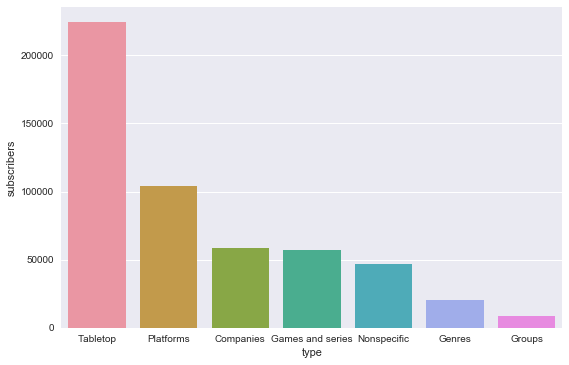

In [91]:
df = (subreddits.groupby('type', as_index=False)
      .agg({'subscribers':'mean'})
      .sort_values('subscribers', ascending=False))
sns.barplot(data=df, x='type',y='subscribers')

# Submissions

In [57]:
submissions.head()

,author_fullname,author_id,author_name,clicked,domain,downvotes,edited,fullname,gilded,id,...,media_only,mod_note,name,num_comments,score,selftext,subreddit,subreddit_id,title,upvotes
0,t2_9i3eg,9i3eg,SimplifyEUW,0.0,self.leagueoflegends,0.0,1.491081e+09,t3_62phzt,0.0,62phzt,...,0.0,NaN,t3_62phzt,873.0,68963.0,Lets do this /r/leagueoflegends!!!\r\n\r\nEDIT...,leagueoflegends,t5_2rfxx,OUR LORD AND SAVIOUR MARC MERRILL HAS SAID IF ...,68963.0
1,t2_juubx,juubx,CarterIsBad,0.0,self.leagueoflegends,0.0,1.515095e+09,t3_7o5bj9,1.0,7o5bj9,...,0.0,NaN,t3_7o5bj9,4880.0,53882.0,[Unbanned](https://twitter.com/lol_tyler1/stat...,leagueoflegends,t5_2rfxx,Tyler1 unbanned from League of Legends,53882.0
2,t2_8bqod,8bqod,KILLERCRACK,0.0,i.redd.it,0.0,0.000000e+00,t3_88rypt,0.0,88rypt,...,0.0,NaN,t3_88rypt,312.0,50985.0,NaN,leagueoflegends,t5_2rfxx,Jesus Christ. If this gets enough upvotes it w...,50985.0
3,t2_8cqiq,8cqiq,MontageRyanxD,0.0,twitlonger.com,0.0,0.000000e+00,t3_88vzaw,2.0,88vzaw,...,0.0,NaN,t3_88vzaw,3934.0,50028.0,NaN,leagueoflegends,t5_2rfxx,DoubleLift's Statement on his Family,50028.0
4,t2_o06ux,o06ux,Pyrals,0.0,self.leagueoflegends,0.0,1.527206e+09,t3_8lxchp,2.0,8lxchp,...,0.0,NaN,t3_8lxchp,1019.0,49019.0,Totalbiscuit has passed away as of today on Ma...,leagueoflegends,t5_2rfxx,"Totalbiscuit has passed away, let us never for...",49019.0


In [126]:
# Subreddit-specific Self-Text Corpus
df = (submissions
      .dropna(subset=['selftext'])
      .groupby('subreddit', as_index=False)
      .agg({'selftext':'sum'}))
df['corpus_len'] = df.selftext.apply(len)
df.sort_values('corpus_len', ascending=False)

,subreddit,selftext,corpus_len
99,FutureFight,I keep seeing posts where people ask who to sp...,85884
46,ClearBackblast,You few do far more than most people realize t...,68684
90,FanTheories,The title quote comes from Thanos speaking to ...,66728
309,aion,**Hey everyone! Welcome to my Ping Reducing Gu...,54084
519,ps3deals,"So, I missed a few sales and just thought I'd ...",50324
396,falloutlore,"Hi, everybody. This will be brief as I don't w...",40341
507,pkmntcg,A lot of new players start out with theme deck...,39626
85,FIFA,"Hello,\r\n\r\nI'm french and i live in the car...",39208
77,Egttr,Story is based in a rural English village name...,36835
167,MUD,There's a trend I notice where users suggest g...,32942


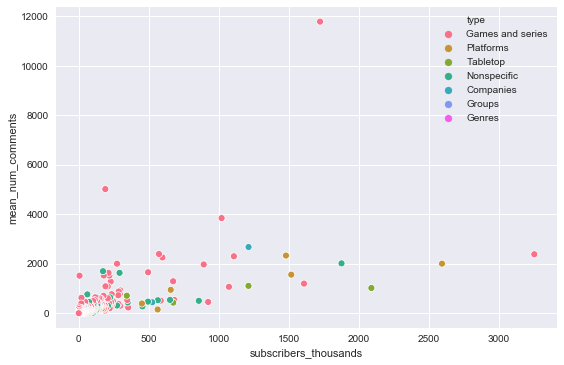

In [73]:
df = (submissions.groupby('subreddit', as_index=False)
 .agg({"score":"mean", 'num_comments':'mean'})
 .rename(columns={'score':'mean_score', 'num_comments':'mean_num_comments'})
 .merge(subreddits, left_on='subreddit', right_on='display_name')
 #.drop(columns=['Link','https_Link','title','label','table_number','display_name'])
 .sort_values('subscribers', ascending=False))
df['subscribers_thousands'] = df['subscribers'] / 1000.00

sns.scatterplot(data=df, x='subscribers_thousands', y='mean_num_comments', hue='type')
#sns.despine(left=True)
plt.show()

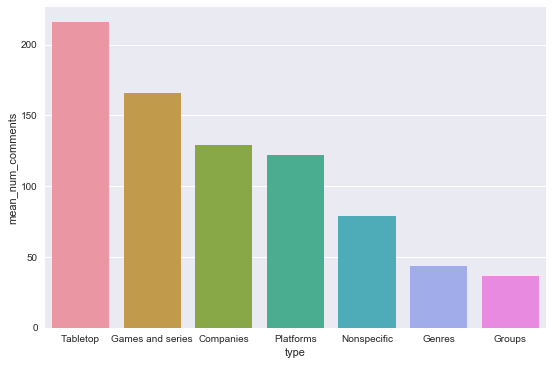

In [90]:
df = (df.groupby('type', as_index=False)
      .agg({'mean_score':'mean', 'mean_num_comments':'mean', 'subscribers_thousands':'mean'}))

sns.barplot(data=df.sort_values('mean_num_comments', ascending=False),
            x='type', y='mean_num_comments')